In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [12]:
fuji = pd.read_csv("fuji_fp_vs_fastspec.csv")
fuji

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix_1,survey_1,program_1,targetid.1,...,absmag_ivar_sdss_r,kcorr_sdss_z,absmag_sdss_z,absmag_ivar_sdss_z,kcorr_wise_w1,absmag_wise_w1,absmag_ivar_wise_w1,kcorr_wise_w2,absmag_wise_w2,absmag_ivar_wise_w2
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,6.864268e+06,-0.153637,-20.291296,1.258951e+07,-0.057498,-19.958840,5.390598e+05,-0.086881,-19.300663,95850.83600
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,4.621188e+07,-0.176486,-22.903370,9.624522e+07,-0.059133,-22.603800,4.380470e+06,-0.092896,-21.980112,898414.00000
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,3.707012e+06,-0.161287,-20.255432,7.094188e+06,-0.065946,-19.840860,2.296077e+05,-0.097060,-19.197270,33974.58000
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,1.548694e+07,-0.187822,-20.965443,3.227442e+07,-0.027884,-20.433800,2.370734e+06,-0.041374,-19.857975,493986.90000
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,1.639678e+07,-0.195730,-21.214628,3.650948e+07,-0.046264,-20.956923,1.523140e+06,-0.075110,-20.288490,289033.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,39627865775411472,578,151.193575,3.179417,39627865775411472,3280,27262,sv3,bright,39627865775411472,...,2.533935e+05,-0.137885,-20.509462,2.643075e+05,-0.217700,-20.170479,1.723853e+04,-0.361689,-19.550999,2327.13900
6520,39633338968836400,25,176.682035,56.325498,39633338968836400,2670,6004,sv2,bright,39633338968836400,...,2.474047e+04,-0.139464,-20.993444,3.035748e+04,-0.374815,-19.766651,1.229263e+03,-0.476557,-19.248955,179.72005
6521,39627628545578443,30,36.097224,-6.412998,39627628545578443,922,17680,sv1,bright,39627628545578443,...,2.963088e+06,-0.150244,-19.854774,2.089500e+06,-0.115682,-19.462757,4.413535e+04,-0.178430,-18.761288,5144.67530
6522,39633307725466372,337,173.525018,53.919783,39633307725466372,2657,5976,sv2,bright,39633307725466372,...,1.388210e+05,-0.186316,-20.452480,2.762498e+05,-0.146400,-20.294235,4.481097e+04,-0.211048,-19.729500,7266.79350


In [19]:
ppxf_sigma = fuji.ppxf_sigma
ppxf_sigma_error = fuji.ppxf_sigma_error
veldisp = fuji.vdisp
veldispErr = 1./np.sqrt(fuji.vdisp_ivar)
pull_pipe_1 = (ppxf_sigma - veldisp)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(veldispErr*veldispErr)))

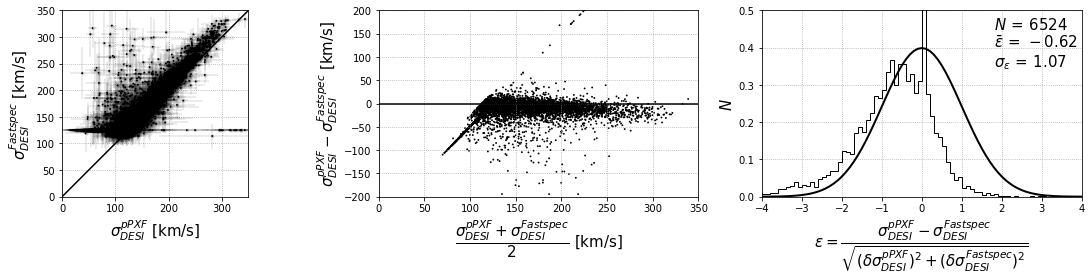

In [22]:
f_1, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(16, 4),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$ [km/s]',size=15)
ax1.set_ylabel(r'$\sigma_{DESI}^{Fastspec}$ [km/s]',size=15)
ax1.grid(b=True, which='both', color='0.65',linestyle=':')


ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(((ppxf_sigma+veldisp)/2.),ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\sigma_{DESI}^{pPXF} + \sigma_{DESI}^{Fastspec}}{2}$ [km/s]',size=15)
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{DESI}^{Fastspec}$ [km/s]',size=15)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_DESI')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\sigma_{DESI}^{pPXF} - \sigma_{DESI}^{Fastspec}}{\sqrt{(\delta \sigma_{DESI}^{pPXF})^2 + (\delta \sigma_{DESI}^{Fastspec})^2}}$',size=15)
ax3.set_ylabel(r'$N$',size=15)
ax3.text(2.0-0.2,0.45,r'$N\/=\/'+'{0:.0f}'.format(len(pull_pipe_1))+'$',size=15)
ax3.text(2.0-0.2,0.4,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)
ax3.text(2.0-0.2,0.35,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$',size=15)#, fontname = 'Times New Roman',size=20)


plt.tight_layout()
plt.savefig('fuji_ppxf_fastspec.png')
plt.savefig('fuji_ppxf_fastspec.pdf')
plt.show()